In [1]:
# prompt: mount on google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


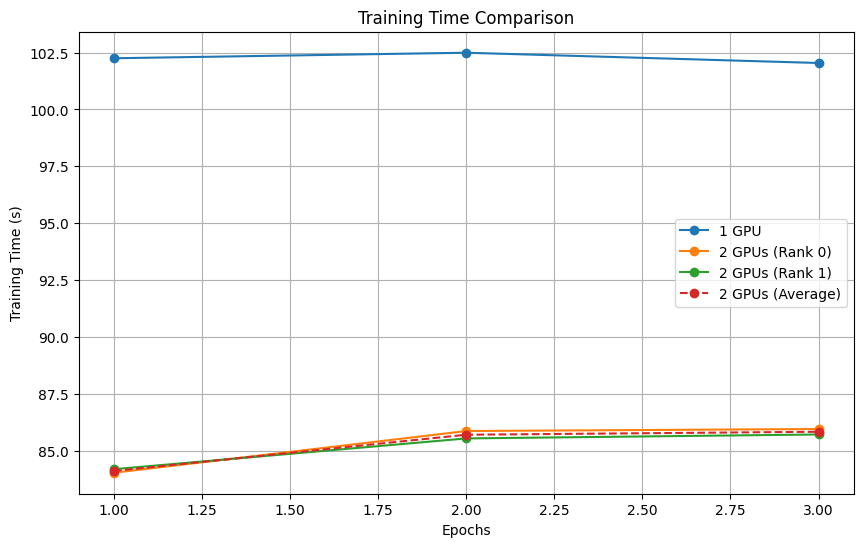

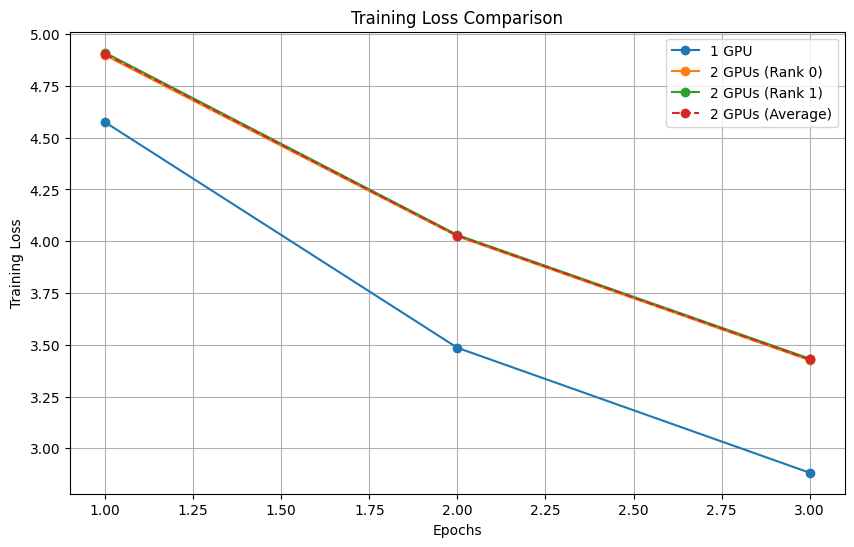

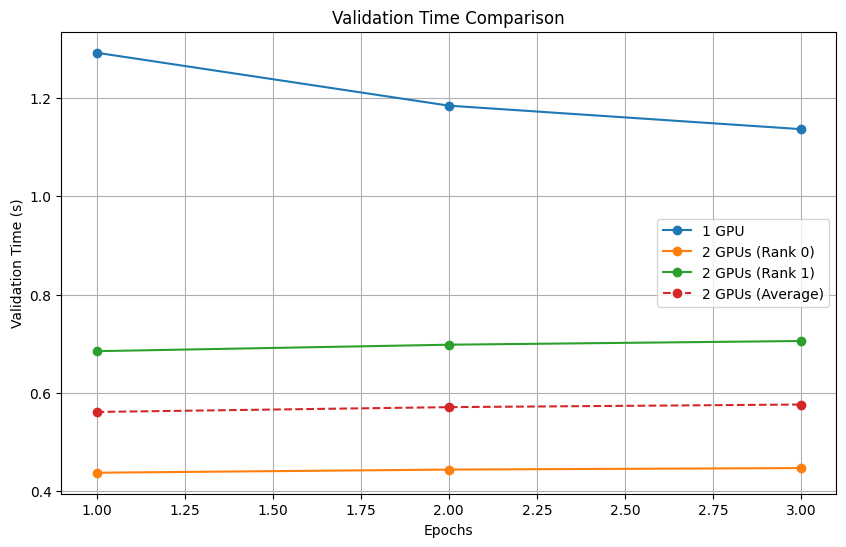

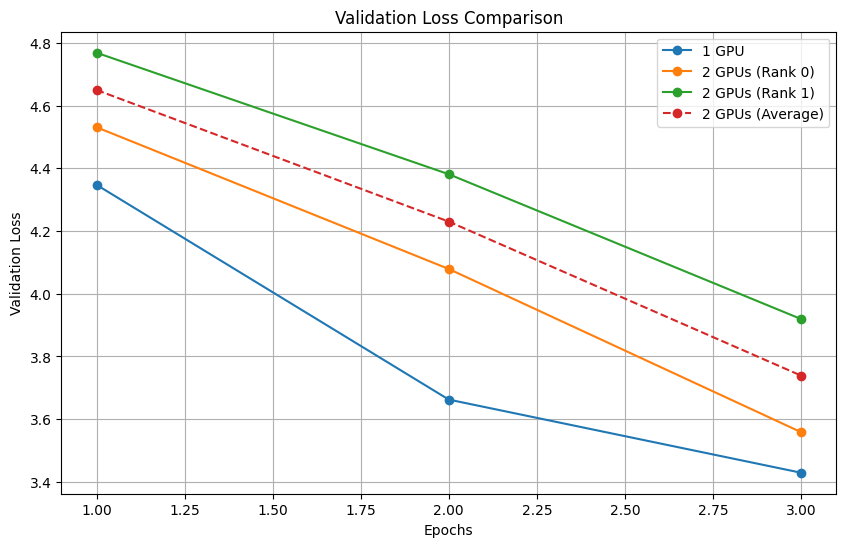

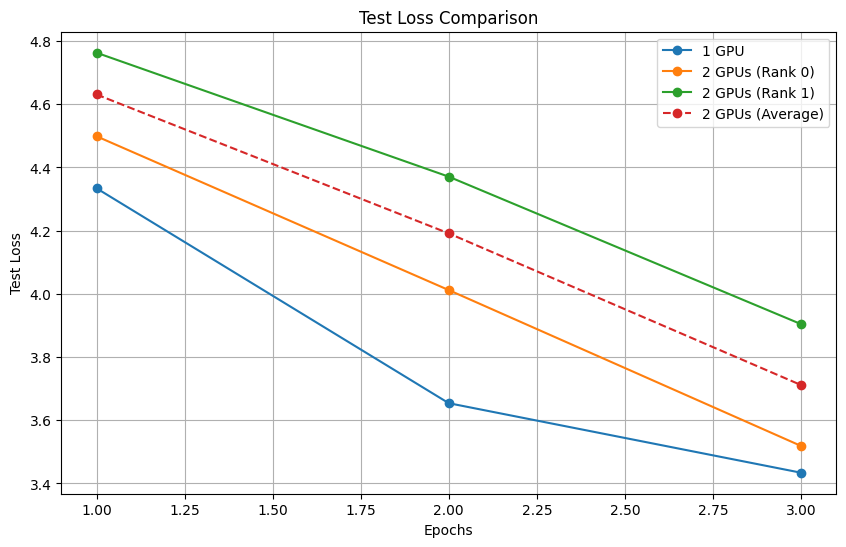

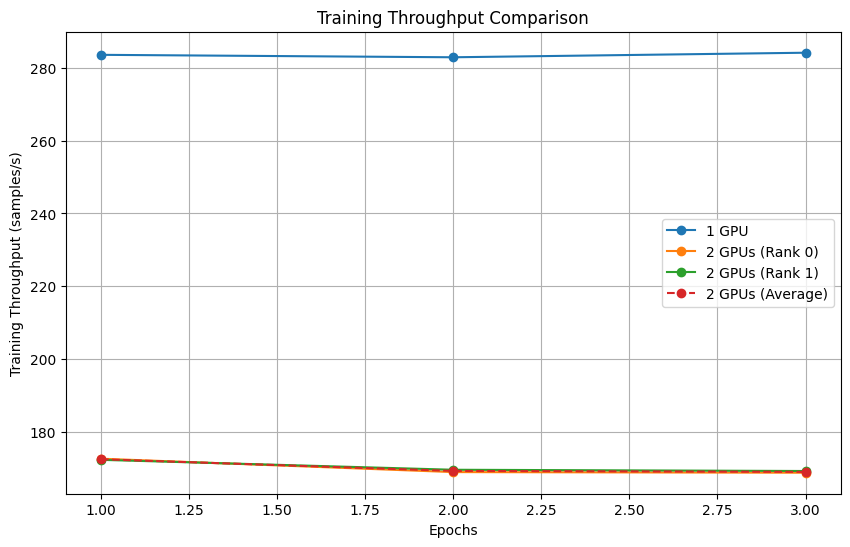

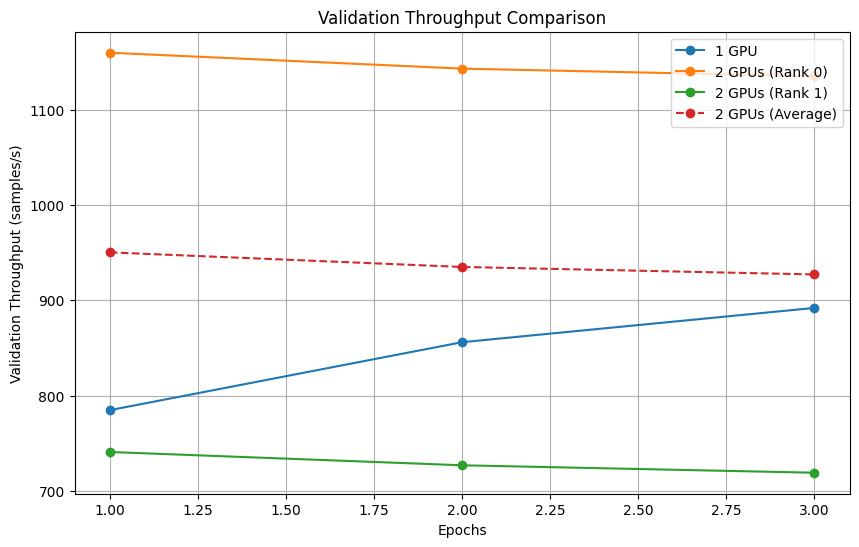

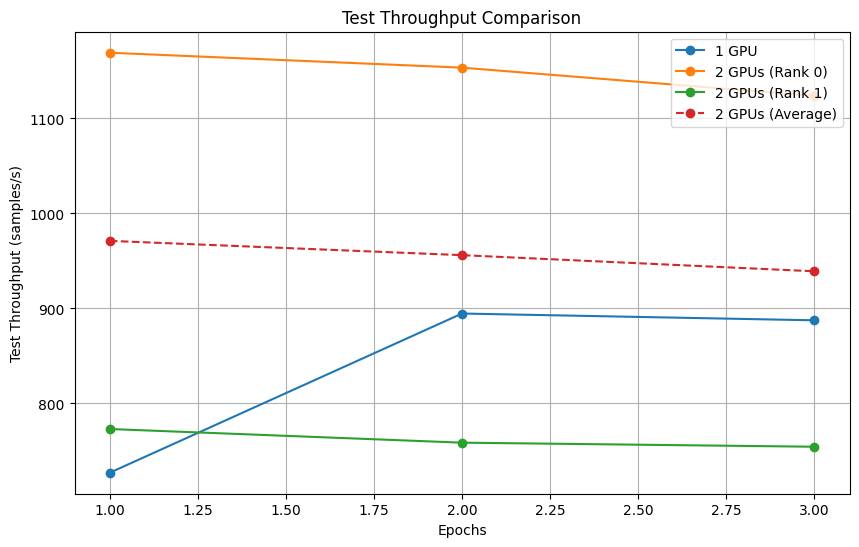

In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_training_metrics_seq2seq(json_file_1gpu, json_file_2gpus):
    """
    Generates plots comparing training metrics from 1-GPU and 2-GPU setups for a seq2seq model.
    Includes plots for rank 0, rank 1, and their average for the 2-GPU setup.
    """
    # Load 1-GPU data
    with open(json_file_1gpu, 'r') as f:
        data_1gpu = json.load(f)
    seq2seq_1gpu = data_1gpu['seq2seq_1_GPUs_rank_0']

    # Load 2-GPU data
    with open(json_file_2gpus, 'r') as f:
        data_2gpus = json.load(f)
    seq2seq_2gpus_rank0 = data_2gpus['seq2seq_2_GPUs_rank_0']
    seq2seq_2gpus_rank1 = data_2gpus['seq2seq_2_GPUs_rank_1']

    # Extract data for 1 GPU
    train_times_1gpu = seq2seq_1gpu['training_times']
    train_losses_1gpu = seq2seq_1gpu['train_losses']
    val_times_1gpu = seq2seq_1gpu['validation_times']
    val_losses_1gpu = seq2seq_1gpu['validation_losses']
    test_losses_1gpu = seq2seq_1gpu['test_losses']
    train_throughputs_1gpu = seq2seq_1gpu['train_throughputs']
    val_throughputs_1gpu = seq2seq_1gpu['validation_throughputs']
    test_throughputs_1gpu = seq2seq_1gpu['test_throughputs']

    # Extract data for 2 GPUs (rank 0)
    train_times_2gpus_rank0 = seq2seq_2gpus_rank0['training_times']
    train_losses_2gpus_rank0 = seq2seq_2gpus_rank0['train_losses']
    val_times_2gpus_rank0 = seq2seq_2gpus_rank0['validation_times']
    val_losses_2gpus_rank0 = seq2seq_2gpus_rank0['validation_losses']
    test_losses_2gpus_rank0 = seq2seq_2gpus_rank0['test_losses']
    train_throughputs_2gpus_rank0 = seq2seq_2gpus_rank0['train_throughputs']
    val_throughputs_2gpus_rank0 = seq2seq_2gpus_rank0['validation_throughputs']
    test_throughputs_2gpus_rank0 = seq2seq_2gpus_rank0['test_throughputs']

    # Extract data for 2 GPUs (rank 1)
    train_times_2gpus_rank1 = seq2seq_2gpus_rank1['training_times']
    train_losses_2gpus_rank1 = seq2seq_2gpus_rank1['train_losses']
    val_times_2gpus_rank1 = seq2seq_2gpus_rank1['validation_times']
    val_losses_2gpus_rank1 = seq2seq_2gpus_rank1['validation_losses']
    test_losses_2gpus_rank1 = seq2seq_2gpus_rank1['test_losses']
    train_throughputs_2gpus_rank1 = seq2seq_2gpus_rank1['train_throughputs']
    val_throughputs_2gpus_rank1 = seq2seq_2gpus_rank1['validation_throughputs']
    test_throughputs_2gpus_rank1 = seq2seq_2gpus_rank1['test_throughputs']

    # Calculate averages for 2 GPUs
    train_times_2gpus_avg = np.mean([train_times_2gpus_rank0, train_times_2gpus_rank1], axis=0)
    train_losses_2gpus_avg = np.mean([train_losses_2gpus_rank0, train_losses_2gpus_rank1], axis=0)
    val_times_2gpus_avg = np.mean([val_times_2gpus_rank0, val_times_2gpus_rank1], axis=0)
    val_losses_2gpus_avg = np.mean([val_losses_2gpus_rank0, val_losses_2gpus_rank1], axis=0)
    test_losses_2gpus_avg = np.mean([test_losses_2gpus_rank0, test_losses_2gpus_rank1], axis=0)
    train_throughputs_2gpus_avg = np.mean([train_throughputs_2gpus_rank0, train_throughputs_2gpus_rank1], axis=0)
    val_throughputs_2gpus_avg = np.mean([val_throughputs_2gpus_rank0, val_throughputs_2gpus_rank1], axis=0)
    test_throughputs_2gpus_avg = np.mean([test_throughputs_2gpus_rank0, test_throughputs_2gpus_rank1], axis=0)

    # Epochs for x-axis
    epochs = [1, 2, 3]

    # Plot Training Times
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_times_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, train_times_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, train_times_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, train_times_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Training Time (s)')
    plt.title('Training Time Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Training Losses
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, train_losses_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, train_losses_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, train_losses_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Validation Times
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, val_times_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, val_times_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, val_times_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, val_times_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Time (s)')
    plt.title('Validation Time Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Validation Losses
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, val_losses_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, val_losses_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, val_losses_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, val_losses_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Test Losses
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, test_losses_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, test_losses_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, test_losses_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, test_losses_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Test Loss')
    plt.title('Test Loss Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Training Throughput
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_throughputs_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, train_throughputs_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, train_throughputs_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, train_throughputs_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Training Throughput (samples/s)')
    plt.title('Training Throughput Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Validation Throughput
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, val_throughputs_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, val_throughputs_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, val_throughputs_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, val_throughputs_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Throughput (samples/s)')
    plt.title('Validation Throughput Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Test Throughput
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, test_throughputs_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, test_throughputs_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, test_throughputs_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, test_throughputs_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Test Throughput (samples/s)')
    plt.title('Test Throughput Comparison')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    plot_training_metrics_seq2seq('/content/drive/MyDrive/GPU /project4-1gpu.json', '/content/drive/MyDrive/GPU /project4-2gpus.json')

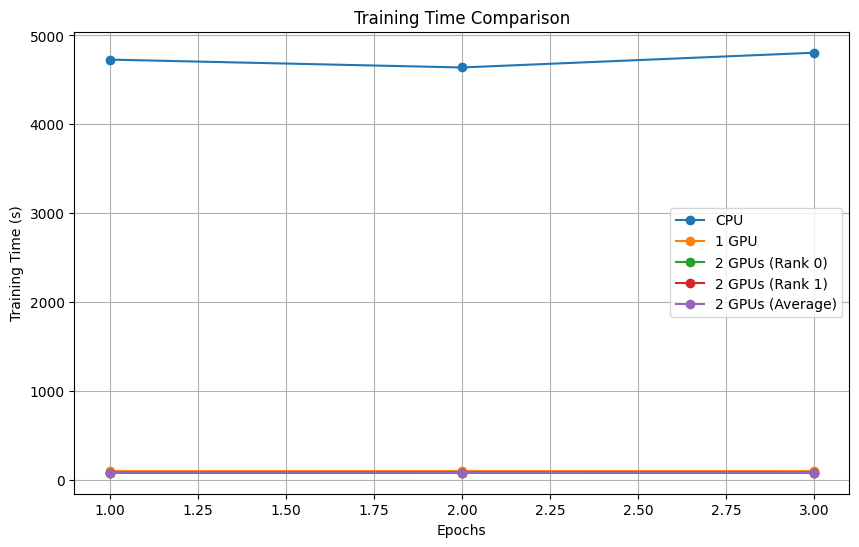

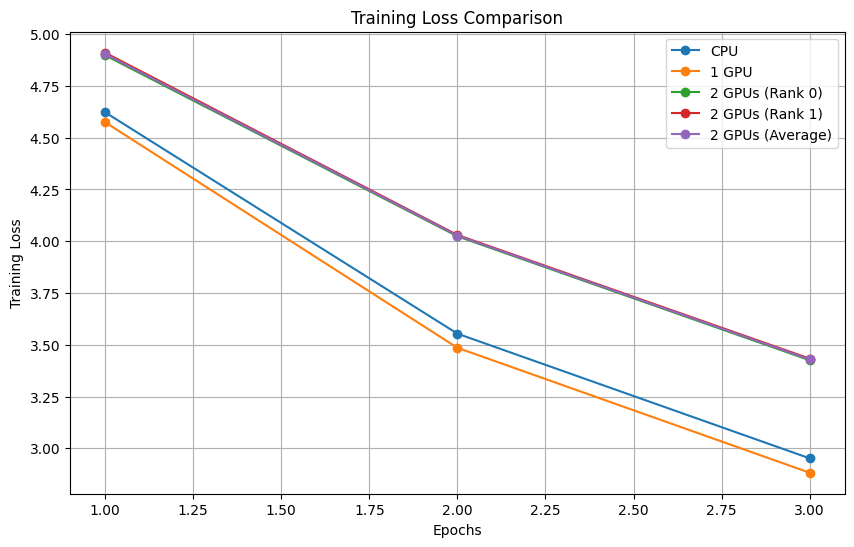

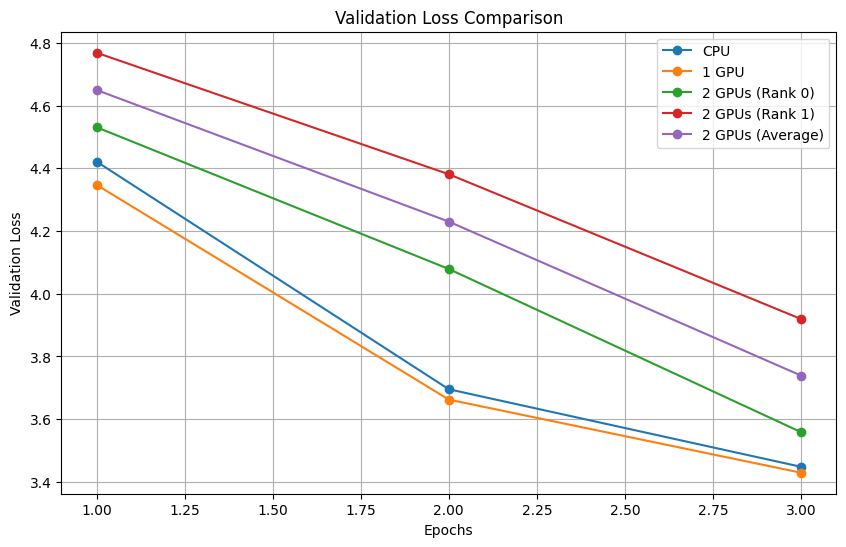

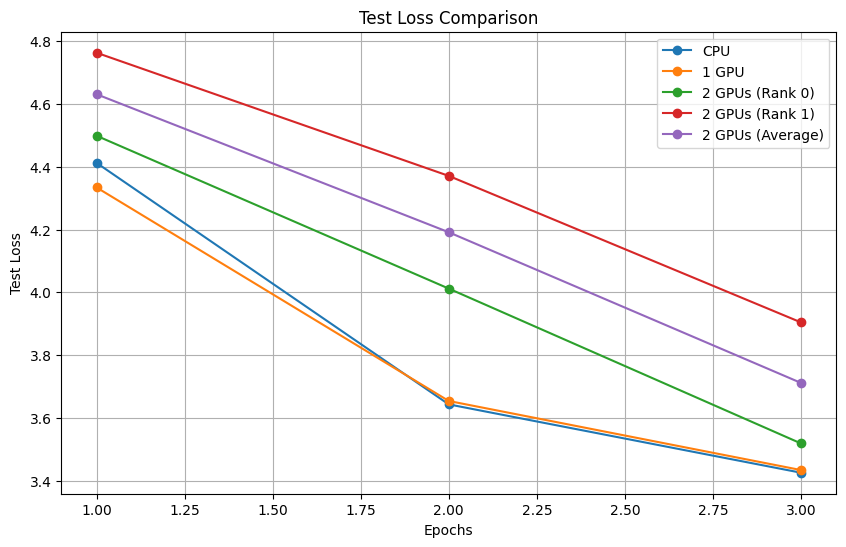

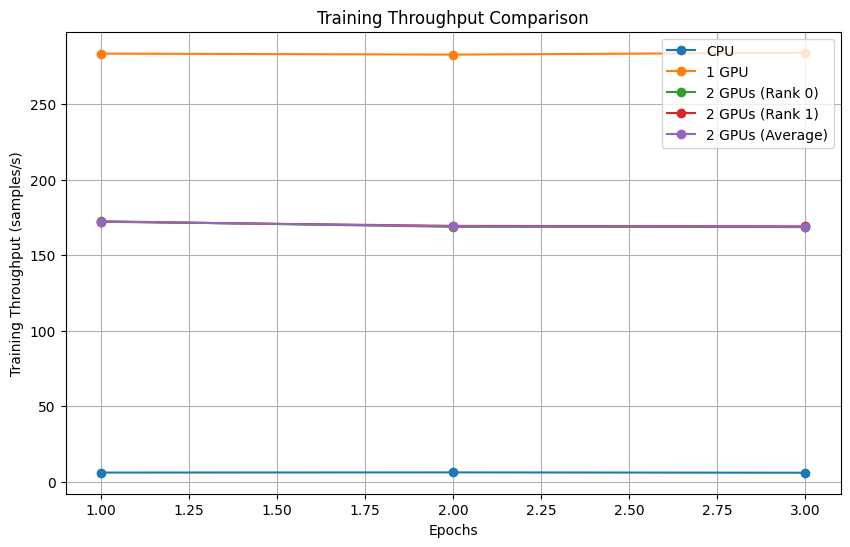

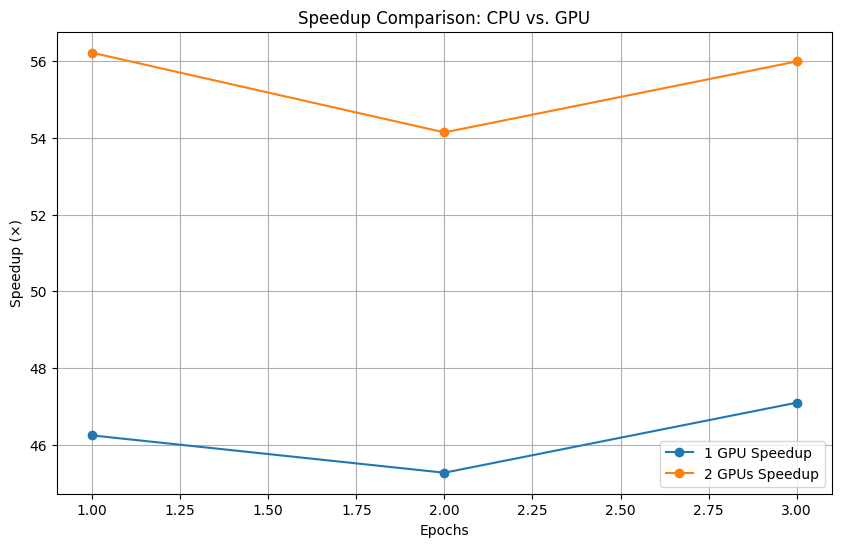

In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_training_metrics_seq2seq(json_file_cpu, json_file_1gpu, json_file_2gpus):
    """
    Generates plots comparing training metrics from CPU, 1-GPU, and 2-GPU setups for a seq2seq model.
    Includes plots for rank 0, rank 1, and their average for the 2-GPU setup.
    """
    # Load CPU data
    with open(json_file_cpu, 'r') as f:
        data_cpu = json.load(f)
    seq2seq_cpu = data_cpu['seq2seq_CPU_rank_0']

    # Load 1-GPU data
    with open(json_file_1gpu, 'r') as f:
        data_1gpu = json.load(f)
    seq2seq_1gpu = data_1gpu['seq2seq_1_GPUs_rank_0']

    # Load 2-GPU data
    with open(json_file_2gpus, 'r') as f:
        data_2gpus = json.load(f)
    seq2seq_2gpus_rank0 = data_2gpus['seq2seq_2_GPUs_rank_0']
    seq2seq_2gpus_rank1 = data_2gpus['seq2seq_2_GPUs_rank_1']

    # Extract data for CPU
    train_times_cpu = seq2seq_cpu['training_times']
    train_losses_cpu = seq2seq_cpu['train_losses']
    val_times_cpu = seq2seq_cpu['validation_times']
    val_losses_cpu = seq2seq_cpu['validation_losses']
    test_losses_cpu = seq2seq_cpu['test_losses']
    train_throughputs_cpu = seq2seq_cpu['train_throughputs']
    val_throughputs_cpu = seq2seq_cpu['validation_throughputs']
    test_throughputs_cpu = seq2seq_cpu['test_throughputs']

    # Extract data for 1 GPU
    train_times_1gpu = seq2seq_1gpu['training_times']
    train_losses_1gpu = seq2seq_1gpu['train_losses']
    val_times_1gpu = seq2seq_1gpu['validation_times']
    val_losses_1gpu = seq2seq_1gpu['validation_losses']
    test_losses_1gpu = seq2seq_1gpu['test_losses']
    train_throughputs_1gpu = seq2seq_1gpu['train_throughputs']
    val_throughputs_1gpu = seq2seq_1gpu['validation_throughputs']
    test_throughputs_1gpu = seq2seq_1gpu['test_throughputs']

    # Extract data for 2 GPUs
    train_times_2gpus_rank0 = seq2seq_2gpus_rank0['training_times']
    train_losses_2gpus_rank0 = seq2seq_2gpus_rank0['train_losses']
    val_times_2gpus_rank0 = seq2seq_2gpus_rank0['validation_times']
    val_losses_2gpus_rank0 = seq2seq_2gpus_rank0['validation_losses']
    test_losses_2gpus_rank0 = seq2seq_2gpus_rank0['test_losses']
    train_throughputs_2gpus_rank0 = seq2seq_2gpus_rank0['train_throughputs']
    val_throughputs_2gpus_rank0 = seq2seq_2gpus_rank0['validation_throughputs']
    test_throughputs_2gpus_rank0 = seq2seq_2gpus_rank0['test_throughputs']

    train_times_2gpus_rank1 = seq2seq_2gpus_rank1['training_times']
    train_losses_2gpus_rank1 = seq2seq_2gpus_rank1['train_losses']
    val_times_2gpus_rank1 = seq2seq_2gpus_rank1['validation_times']
    val_losses_2gpus_rank1 = seq2seq_2gpus_rank1['validation_losses']
    test_losses_2gpus_rank1 = seq2seq_2gpus_rank1['test_losses']
    train_throughputs_2gpus_rank1 = seq2seq_2gpus_rank1['train_throughputs']
    val_throughputs_2gpus_rank1 = seq2seq_2gpus_rank1['validation_throughputs']
    test_throughputs_2gpus_rank1 = seq2seq_2gpus_rank1['test_throughputs']

    # Calculate averages for 2 GPUs
    train_times_2gpus_avg = np.mean([train_times_2gpus_rank0, train_times_2gpus_rank1], axis=0)
    train_losses_2gpus_avg = np.mean([train_losses_2gpus_rank0, train_losses_2gpus_rank1], axis=0)
    val_times_2gpus_avg = np.mean([val_times_2gpus_rank0, val_times_2gpus_rank1], axis=0)
    val_losses_2gpus_avg = np.mean([val_losses_2gpus_rank0, val_losses_2gpus_rank1], axis=0)
    test_losses_2gpus_avg = np.mean([test_losses_2gpus_rank0, test_losses_2gpus_rank1], axis=0)
    train_throughputs_2gpus_avg = np.mean([train_throughputs_2gpus_rank0, train_throughputs_2gpus_rank1], axis=0)
    val_throughputs_2gpus_avg = np.mean([val_throughputs_2gpus_rank0, val_throughputs_2gpus_rank1], axis=0)
    test_throughputs_2gpus_avg = np.mean([test_throughputs_2gpus_rank0, test_throughputs_2gpus_rank1], axis=0)

    # Epochs for x-axis
    epochs = [1, 2, 3]

    # List of plots to generate
    metrics = [
        ("Training Time (s)", "Training Time", [train_times_cpu, train_times_1gpu, train_times_2gpus_rank0, train_times_2gpus_rank1, train_times_2gpus_avg]),
        ("Training Loss", "Training Loss", [train_losses_cpu, train_losses_1gpu, train_losses_2gpus_rank0, train_losses_2gpus_rank1, train_losses_2gpus_avg]),
        ("Validation Loss", "Validation Loss", [val_losses_cpu, val_losses_1gpu, val_losses_2gpus_rank0, val_losses_2gpus_rank1, val_losses_2gpus_avg]),
        ("Test Loss", "Test Loss", [test_losses_cpu, test_losses_1gpu, test_losses_2gpus_rank0, test_losses_2gpus_rank1, test_losses_2gpus_avg]),
        ("Training Throughput (samples/s)", "Training Throughput", [train_throughputs_cpu, train_throughputs_1gpu, train_throughputs_2gpus_rank0, train_throughputs_2gpus_rank1, train_throughputs_2gpus_avg]),
    ]

    labels = ["CPU", "1 GPU", "2 GPUs (Rank 0)", "2 GPUs (Rank 1)", "2 GPUs (Average)"]

    # Generate plots for each metric
    for ylabel, title, datasets in metrics:
        plt.figure(figsize=(10, 6))
        for data, label in zip(datasets, labels):
            plt.plot(epochs, data, label=label, marker='o')
        plt.xlabel("Epochs")
        plt.ylabel(ylabel)
        plt.title(f"{title} Comparison")
        plt.legend()
        plt.grid()
        plt.show()

    # Speedup Calculation
    speedup_1gpu = np.array(train_times_cpu) / np.array(train_times_1gpu)
    speedup_2gpus = np.array(train_times_cpu) / np.array(train_times_2gpus_avg)

    # Plot Speedup
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, speedup_1gpu, label="1 GPU Speedup", marker='o')
    plt.plot(epochs, speedup_2gpus, label="2 GPUs Speedup", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Speedup (×)")
    plt.title("Speedup Comparison: CPU vs. GPU")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    plot_training_metrics_seq2seq(
        r'C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-cpu.json', 
        r'C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-1gpu.json', 
        r'C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-2gpus.json'
    )


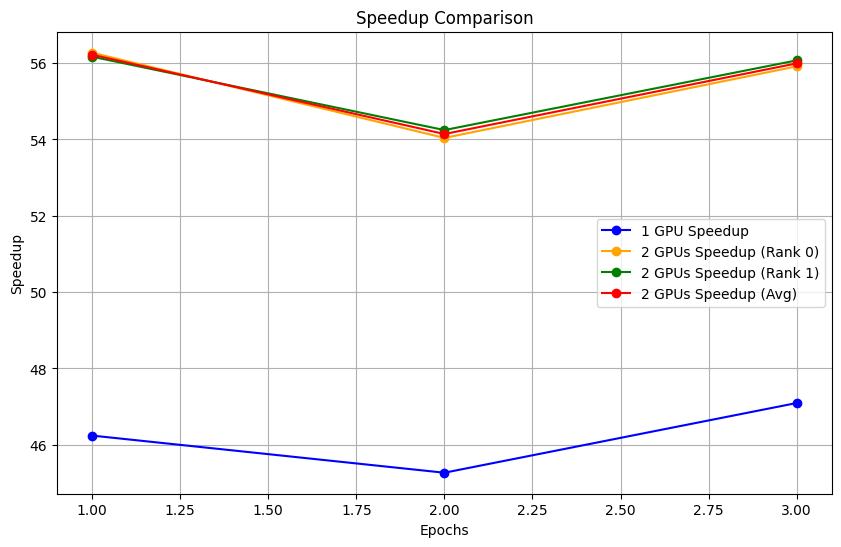

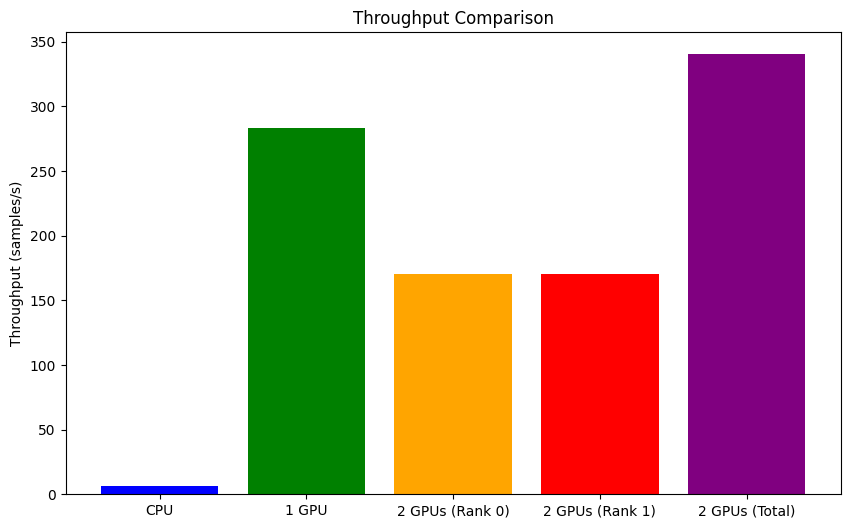

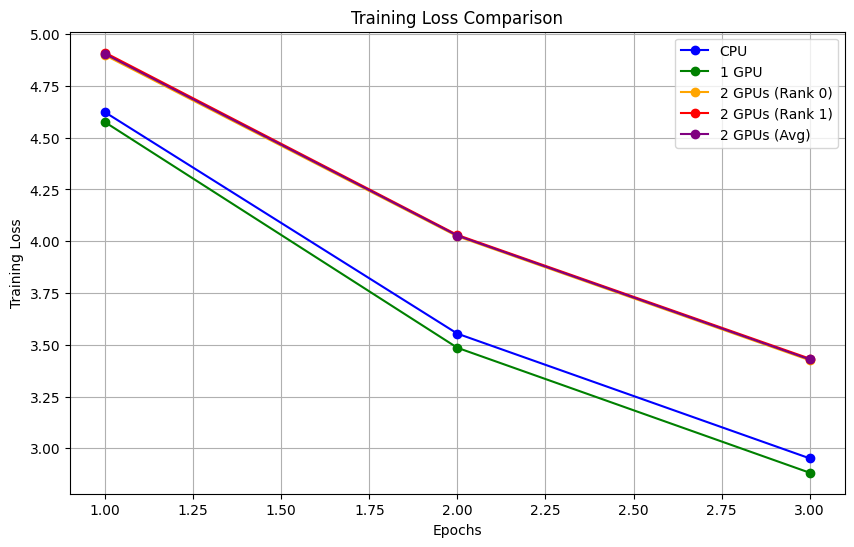

In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np

def compare_performance(json_file_cpu, json_file_1gpu, json_file_2gpus):
    """
    Compare performance metrics (speedup, throughput, losses) across CPU, 1 GPU, and 2 GPUs (Rank 0, Rank 1).
    """
    # Load CPU data
    with open(json_file_cpu, 'r') as f:
        data_cpu = json.load(f)
    seq2seq_cpu = data_cpu['seq2seq_CPU_rank_0']

    # Load 1-GPU data
    with open(json_file_1gpu, 'r') as f:
        data_1gpu = json.load(f)
    seq2seq_1gpu = data_1gpu['seq2seq_1_GPUs_rank_0']

    # Load 2-GPU data
    with open(json_file_2gpus, 'r') as f:
        data_2gpus = json.load(f)
    seq2seq_2gpus_rank0 = data_2gpus['seq2seq_2_GPUs_rank_0']
    seq2seq_2gpus_rank1 = data_2gpus['seq2seq_2_GPUs_rank_1']

    # Extract data
    train_times_cpu = seq2seq_cpu['training_times']
    train_times_1gpu = seq2seq_1gpu['training_times']
    train_times_2gpus_rank0 = seq2seq_2gpus_rank0['training_times']
    train_times_2gpus_rank1 = seq2seq_2gpus_rank1['training_times']
    train_times_2gpus_avg = np.mean([train_times_2gpus_rank0, train_times_2gpus_rank1], axis=0)

    train_losses_cpu = seq2seq_cpu['train_losses']
    train_losses_1gpu = seq2seq_1gpu['train_losses']
    train_losses_2gpus_rank0 = seq2seq_2gpus_rank0['train_losses']
    train_losses_2gpus_rank1 = seq2seq_2gpus_rank1['train_losses']
    train_losses_2gpus_avg = np.mean([train_losses_2gpus_rank0, train_losses_2gpus_rank1], axis=0)

    train_throughput_cpu = seq2seq_cpu['train_throughputs']
    train_throughput_1gpu = seq2seq_1gpu['train_throughputs']
    train_throughput_2gpus_rank0 = seq2seq_2gpus_rank0['train_throughputs']
    train_throughput_2gpus_rank1 = seq2seq_2gpus_rank1['train_throughputs']
    train_throughputs_2gpus_total = np.array(train_throughput_2gpus_rank0) + np.array(train_throughput_2gpus_rank1)

    # Calculate speedup
    speedup_1gpu = np.array(train_times_cpu) / np.array(train_times_1gpu)
    speedup_2gpus_rank0 = np.array(train_times_cpu) / np.array(train_times_2gpus_rank0)
    speedup_2gpus_rank1 = np.array(train_times_cpu) / np.array(train_times_2gpus_rank1)
    speedup_2gpus_avg = np.array(train_times_cpu) / np.array(train_times_2gpus_avg)

    epochs = np.arange(1, len(train_times_cpu) + 1)

    # Plot speedup
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, speedup_1gpu, label="1 GPU Speedup", marker='o', color='blue')
    plt.plot(epochs, speedup_2gpus_rank0, label="2 GPUs Speedup (Rank 0)", marker='o', color='orange')
    plt.plot(epochs, speedup_2gpus_rank1, label="2 GPUs Speedup (Rank 1)", marker='o', color='green')
    plt.plot(epochs, speedup_2gpus_avg, label="2 GPUs Speedup (Avg)", marker='o', color='red')
    plt.xlabel("Epochs")
    plt.ylabel("Speedup")
    plt.title("Speedup Comparison")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot throughput
    plt.figure(figsize=(10, 6))
    plt.bar(['CPU', '1 GPU', '2 GPUs (Rank 0)', '2 GPUs (Rank 1)', '2 GPUs (Total)'], [
        np.mean(train_throughput_cpu),
        np.mean(train_throughput_1gpu),
        np.mean(train_throughput_2gpus_rank0),
        np.mean(train_throughput_2gpus_rank1),
        np.mean(train_throughputs_2gpus_total)
    ], color=['blue', 'green', 'orange', 'red', 'purple'])
    plt.ylabel("Throughput (samples/s)")
    plt.title("Throughput Comparison")
    plt.show()

    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses_cpu, label="CPU", marker='o', color='blue')
    plt.plot(epochs, train_losses_1gpu, label="1 GPU", marker='o', color='green')
    plt.plot(epochs, train_losses_2gpus_rank0, label="2 GPUs (Rank 0)", marker='o', color='orange')
    plt.plot(epochs, train_losses_2gpus_rank1, label="2 GPUs (Rank 1)", marker='o', color='red')
    plt.plot(epochs, train_losses_2gpus_avg, label="2 GPUs (Avg)", marker='o', color='purple')
    plt.xlabel("Epochs")
    plt.ylabel("Training Loss")
    plt.title("Training Loss Comparison")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    compare_performance(
        r'C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-cpu.json',
        r'C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-1gpu.json',
        r'C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-2gpus.json'
    )


Loading CPU data from: C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-cpu.json
CPU Data Loaded Successfully: {'seq2seq_CPU_rank_0': {'world_size': 1, 'training_times': [4728.191455022, 4639.703719225, 4805.604275891999], 'train_losses': [4.622460786405183, 3.553617790489239, 2.9515815217544907], 'validation_times': [51.316296501999204, 50.59680616500009, 50.51815541700125], 'validation_losses': [4.42173670232296, 3.6954286247491837, 3.4480231031775475], 'test_losses': [4.412299059331417, 3.643242083489895, 3.4256437495350838], 'epoch_times': [4829.214300287001, 4738.426199541001, 4903.8742214170015], 'train_throughputs': [6.133426886962149, 6.250401513445986, 6.034641232402074], 'validation_throughputs': [19.760023922559053, 20.040883648905456, 20.072091306365795], 'test_throughputs': [20.17037207856155, 20.87622936145568, 21.036245416837644], 'rank': 0}}
Loading 1-GPU data from: C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-1gpu.json
1-GPU Data Loaded Successfully: {'se

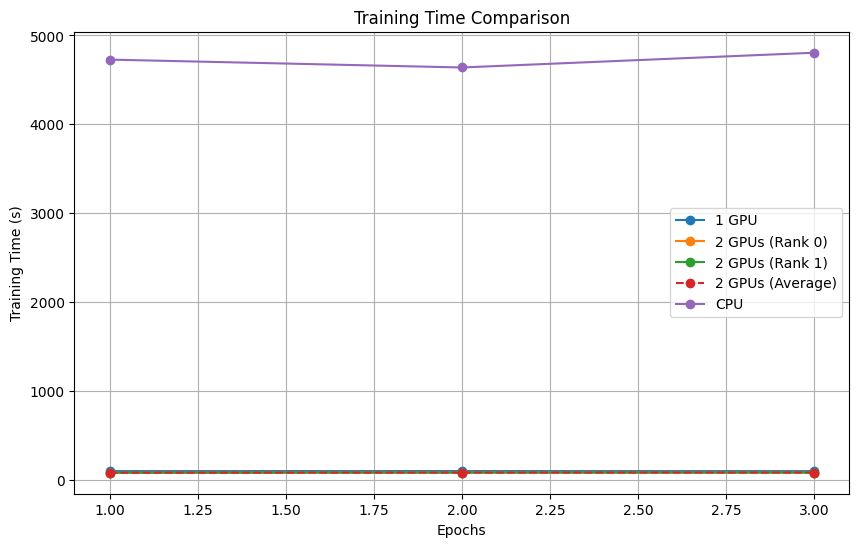

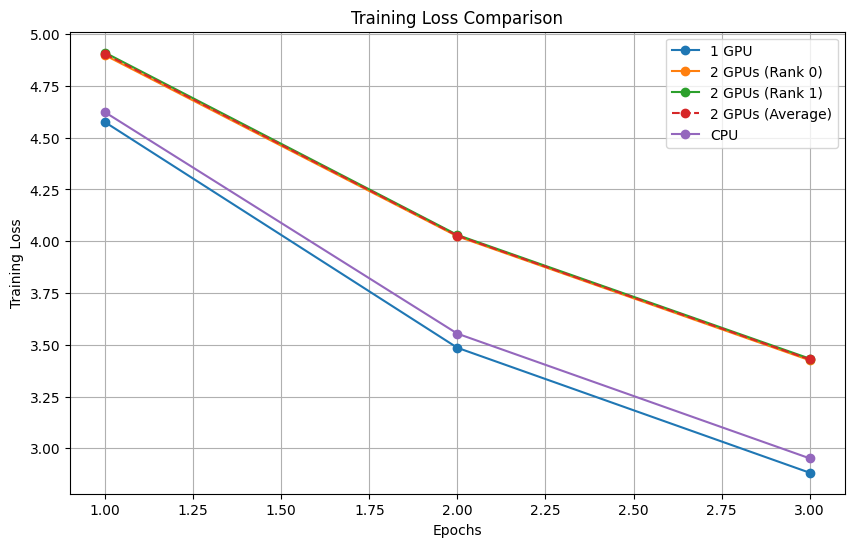

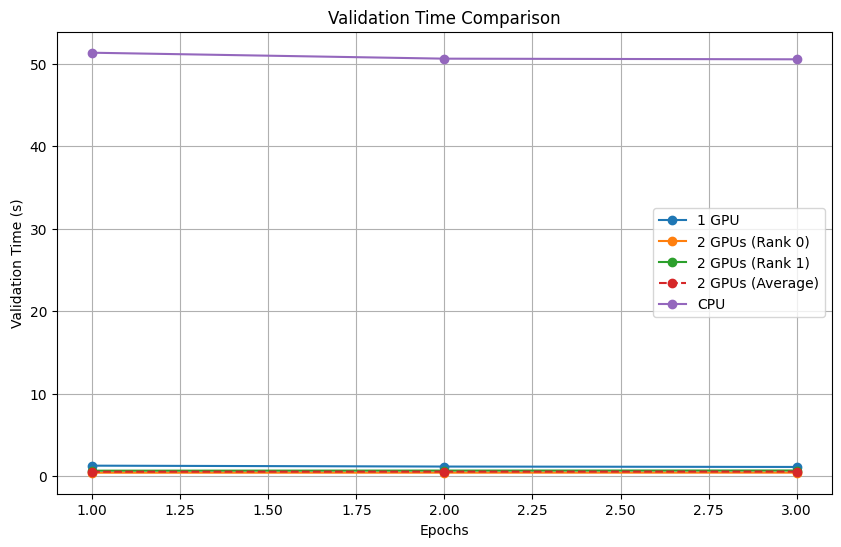

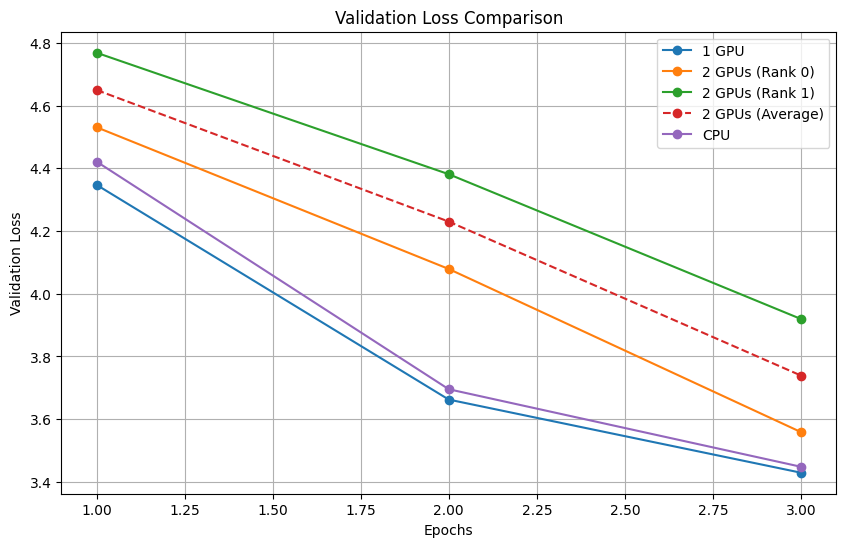

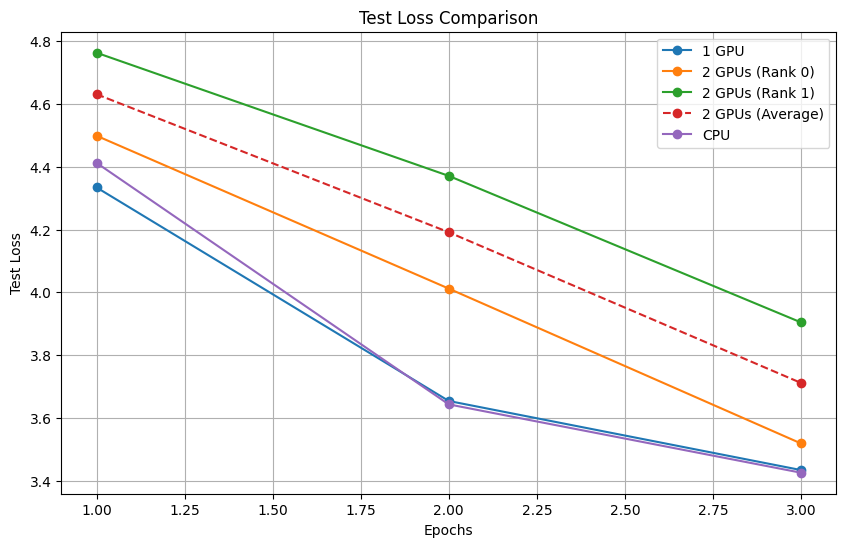

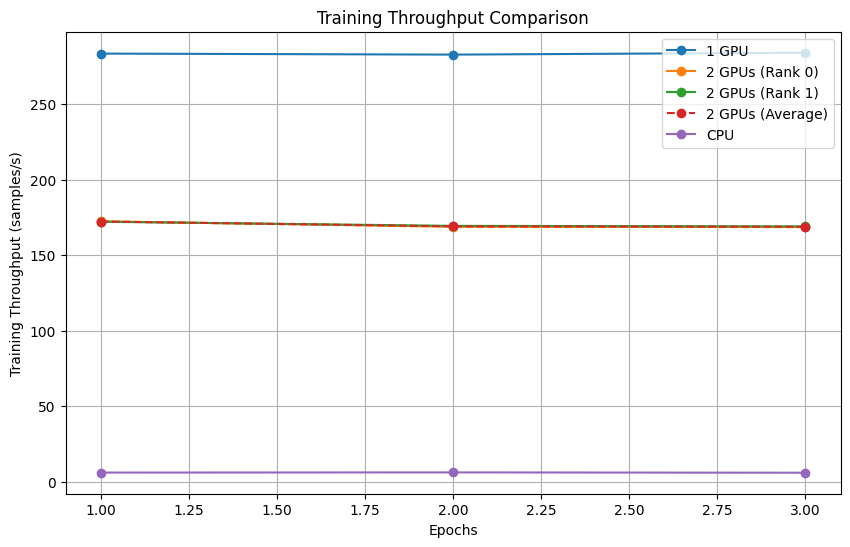

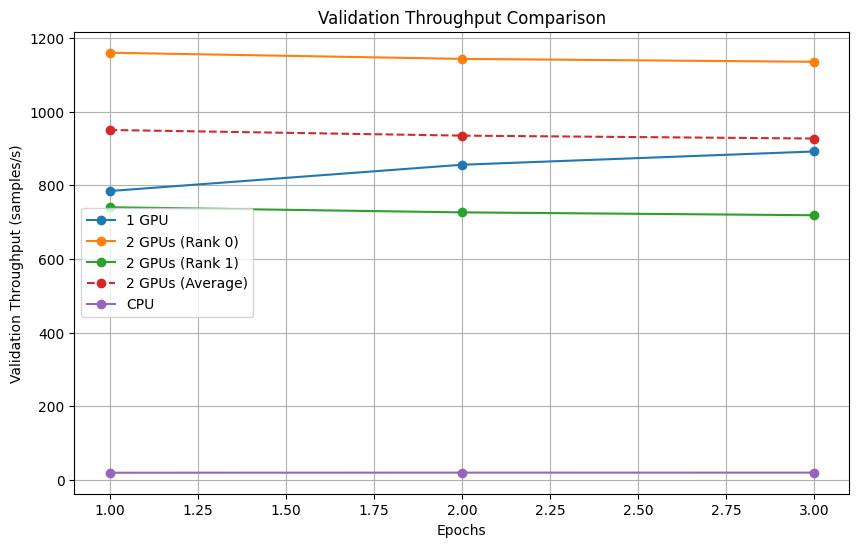

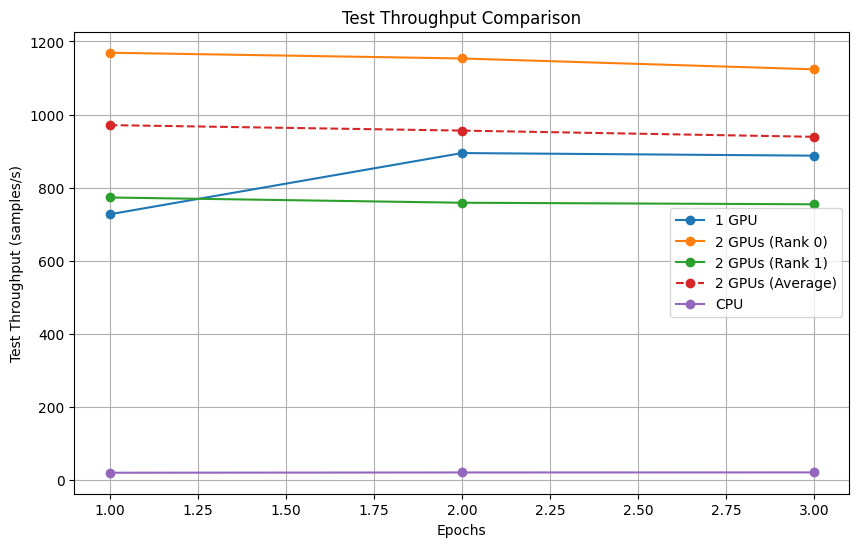

In [26]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_training_metrics_seq2seq(json_file_1gpu, json_file_2gpus, json_file_cpu):
    """
    Generates plots comparing training metrics from 1-GPU, 2-GPU, and CPU setups for a seq2seq model.
    Includes plots for rank 0, rank 1, and their average for the 2-GPU setup.
    """
    try:
        # Load CPU data
        print(f"Loading CPU data from: {json_file_cpu}")  # Debugging statement
        with open(json_file_cpu, 'r') as f:
            data_cpu = json.load(f)
            print("CPU Data Loaded Successfully:", data_cpu)  # Debugging statement
        seq2seq_cpu = data_cpu['seq2seq_CPU_rank_0']

        # Load 1-GPU data
        print(f"Loading 1-GPU data from: {json_file_1gpu}")  # Debugging statement
        with open(json_file_1gpu, 'r') as f:
            data_1gpu = json.load(f)
            print("1-GPU Data Loaded Successfully:", data_1gpu)  # Debugging statement
        seq2seq_1gpu = data_1gpu['seq2seq_1_GPUs_rank_0']

        # Load 2-GPU data
        print(f"Loading 2-GPU data from: {json_file_2gpus}")  # Debugging statement
        with open(json_file_2gpus, 'r') as f:
            data_2gpus = json.load(f)
            print("2-GPU Data Loaded Successfully:", data_2gpus)  # Debugging statement
        seq2seq_2gpus_rank0 = data_2gpus['seq2seq_2_GPUs_rank_0']
        seq2seq_2gpus_rank1 = data_2gpus['seq2seq_2_GPUs_rank_1']

    except KeyError as e:
        print(f"Error: Key {e} not found in the JSON file. Please check the JSON structure.")
        return
    except FileNotFoundError as e:
        print(f"Error: File not found - {e}. Please check the file paths.")
        return
    except json.JSONDecodeError as e:
        print(f"Error: Invalid JSON format in the file - {e}. Please check the file content.")
        return

    # Extract data for 1 GPU
    train_times_1gpu = seq2seq_1gpu['training_times']
    train_losses_1gpu = seq2seq_1gpu['train_losses']
    val_times_1gpu = seq2seq_1gpu['validation_times']
    val_losses_1gpu = seq2seq_1gpu['validation_losses']
    test_losses_1gpu = seq2seq_1gpu['test_losses']
    train_throughputs_1gpu = seq2seq_1gpu['train_throughputs']
    val_throughputs_1gpu = seq2seq_1gpu['validation_throughputs']
    test_throughputs_1gpu = seq2seq_1gpu['test_throughputs']

    # Extract data for 2 GPUs (rank 0)
    train_times_2gpus_rank0 = seq2seq_2gpus_rank0['training_times']
    train_losses_2gpus_rank0 = seq2seq_2gpus_rank0['train_losses']
    val_times_2gpus_rank0 = seq2seq_2gpus_rank0['validation_times']
    val_losses_2gpus_rank0 = seq2seq_2gpus_rank0['validation_losses']
    test_losses_2gpus_rank0 = seq2seq_2gpus_rank0['test_losses']
    train_throughputs_2gpus_rank0 = seq2seq_2gpus_rank0['train_throughputs']
    val_throughputs_2gpus_rank0 = seq2seq_2gpus_rank0['validation_throughputs']
    test_throughputs_2gpus_rank0 = seq2seq_2gpus_rank0['test_throughputs']

    # Extract data for 2 GPUs (rank 1)
    train_times_2gpus_rank1 = seq2seq_2gpus_rank1['training_times']
    train_losses_2gpus_rank1 = seq2seq_2gpus_rank1['train_losses']
    val_times_2gpus_rank1 = seq2seq_2gpus_rank1['validation_times']
    val_losses_2gpus_rank1 = seq2seq_2gpus_rank1['validation_losses']
    test_losses_2gpus_rank1 = seq2seq_2gpus_rank1['test_losses']
    train_throughputs_2gpus_rank1 = seq2seq_2gpus_rank1['train_throughputs']
    val_throughputs_2gpus_rank1 = seq2seq_2gpus_rank1['validation_throughputs']
    test_throughputs_2gpus_rank1 = seq2seq_2gpus_rank1['test_throughputs']

    # Extract data for CPU
    train_times_cpu = seq2seq_cpu['training_times']
    train_losses_cpu = seq2seq_cpu['train_losses']
    val_times_cpu = seq2seq_cpu['validation_times']
    val_losses_cpu = seq2seq_cpu['validation_losses']
    test_losses_cpu = seq2seq_cpu['test_losses']
    train_throughputs_cpu = seq2seq_cpu['train_throughputs']
    val_throughputs_cpu = seq2seq_cpu['validation_throughputs']
    test_throughputs_cpu = seq2seq_cpu['test_throughputs']

    # Calculate averages for 2 GPUs
    train_times_2gpus_avg = np.mean([train_times_2gpus_rank0, train_times_2gpus_rank1], axis=0)
    train_losses_2gpus_avg = np.mean([train_losses_2gpus_rank0, train_losses_2gpus_rank1], axis=0)
    val_times_2gpus_avg = np.mean([val_times_2gpus_rank0, val_times_2gpus_rank1], axis=0)
    val_losses_2gpus_avg = np.mean([val_losses_2gpus_rank0, val_losses_2gpus_rank1], axis=0)
    test_losses_2gpus_avg = np.mean([test_losses_2gpus_rank0, test_losses_2gpus_rank1], axis=0)
    train_throughputs_2gpus_avg = np.mean([train_throughputs_2gpus_rank0, train_throughputs_2gpus_rank1], axis=0)
    val_throughputs_2gpus_avg = np.mean([val_throughputs_2gpus_rank0, val_throughputs_2gpus_rank1], axis=0)
    test_throughputs_2gpus_avg = np.mean([test_throughputs_2gpus_rank0, test_throughputs_2gpus_rank1], axis=0)

    # Epochs for x-axis
    epochs = [1, 2, 3]

    # Plot Training Times
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_times_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, train_times_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, train_times_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, train_times_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.plot(epochs, train_times_cpu, label='CPU', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Training Time (s)')
    plt.title('Training Time Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Training Losses
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, train_losses_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, train_losses_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, train_losses_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.plot(epochs, train_losses_cpu, label='CPU', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Validation Times
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, val_times_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, val_times_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, val_times_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, val_times_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.plot(epochs, val_times_cpu, label='CPU', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Time (s)')
    plt.title('Validation Time Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Validation Losses
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, val_losses_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, val_losses_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, val_losses_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, val_losses_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.plot(epochs, val_losses_cpu, label='CPU', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Test Losses
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, test_losses_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, test_losses_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, test_losses_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, test_losses_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.plot(epochs, test_losses_cpu, label='CPU', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Test Loss')
    plt.title('Test Loss Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Training Throughput
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_throughputs_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, train_throughputs_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, train_throughputs_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, train_throughputs_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.plot(epochs, train_throughputs_cpu, label='CPU', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Training Throughput (samples/s)')
    plt.title('Training Throughput Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Validation Throughput
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, val_throughputs_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, val_throughputs_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, val_throughputs_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, val_throughputs_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.plot(epochs, val_throughputs_cpu, label='CPU', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Throughput (samples/s)')
    plt.title('Validation Throughput Comparison')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Test Throughput
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, test_throughputs_1gpu, label='1 GPU', marker='o')
    plt.plot(epochs, test_throughputs_2gpus_rank0, label='2 GPUs (Rank 0)', marker='o')
    plt.plot(epochs, test_throughputs_2gpus_rank1, label='2 GPUs (Rank 1)', marker='o')
    plt.plot(epochs, test_throughputs_2gpus_avg, label='2 GPUs (Average)', marker='o', linestyle='--')
    plt.plot(epochs, test_throughputs_cpu, label='CPU', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Test Throughput (samples/s)')
    plt.title('Test Throughput Comparison')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    plot_training_metrics_seq2seq(
        r'C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-1gpu.json', 
        r'C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-2gpus.json', 
        r'C:\Users\hafss\OneDrive\Desktop\GPU\project4\project4-cpu.json'
    )